<a href="https://colab.research.google.com/github/NZtechpapa/Cifar10SVM_CNN/blob/master/Assignmen_32_32_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignement 2 Machine Learning 159738 -  Combine Convolutional Neural Network(CNN) and Support Vector Machine (SVM) classification for Cifar 10 dataset

#### Name: Ziyi Wang ID: 18042783

#### Reference: 
    * https://arxiv.org/pdf/1712.03541v2.pdf
    * https://github.com/AFAgarap/cnn-svm

#### Datasets: Cifar 10
* https://www.cs.toronto.edu/~kriz/cifar.html
* https://keras.io/examples/cifar10_cnn/

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
import patsy
import os
#from plt import Image 
import cv2
%matplotlib inline

In [2]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

import time
import sys
print(tf.__version__)

1.13.1


In [0]:
from pylab import rcParams

sns.set(style="ticks")
#sns.set_style("whitegrid")
rcParams['figure.dpi'] = 72
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['patch.edgecolor'] = 'white'
rcParams['font.family'] = 'StixGeneral'
rcParams['figure.figsize'] = 10,8
rcParams['font.size'] = 14
rcParams['axes.labelsize'] = 'large'
rcParams['xtick.labelsize'] = 14
rcParams['ytick.labelsize'] = 14

pd.options.display.max_columns = 50


In [4]:
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

Using TensorFlow backend.


In [5]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
!ls "/content/drive/My Drive/Colab Notebooks/model"

In [0]:
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

In [8]:
save_dir

'/content/saved_models'

# New Section

In [9]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [0]:
def load_label_names():
    return ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [0]:
class_names = load_label_names()
num_classes = 10

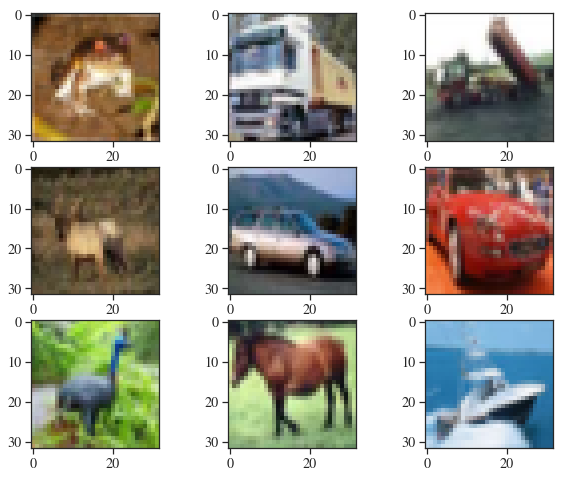

In [13]:
# plot first few images
for i in range(9):
    plt.subplot(330 + 1 + i)
    # define subplot
    plt.imshow(x_train[i])
# show the figure
plt.show()

In [0]:
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

RGB  input ceshi 


In [15]:
x_train.shape
x_train = x_train/255
x_test = x_test/255
print(x_train[0])

[[[0.23137255 0.24313725 0.24705882]
  [0.16862745 0.18039216 0.17647059]
  [0.19607843 0.18823529 0.16862745]
  ...
  [0.61960784 0.51764706 0.42352941]
  [0.59607843 0.49019608 0.4       ]
  [0.58039216 0.48627451 0.40392157]]

 [[0.0627451  0.07843137 0.07843137]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509804 0.21568627]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117647 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215686 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941176 0.19607843]
  [0.47058824 0.32941176 0.19607843]
  [0.42745098 0.28627451 0.16470588]]

 ...

 [[0.81568627 0.66666667 0.37647059]
  [0.78823529 0.6        0.13333333]
  [0.77647059 0.63137255 0.10196078]
  ...
  [0.62745098 0.52156863 0.2745098 ]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333333 0.07843137]]

 [[0.70588235 0.54509804 0.37647059]
  [0.67843137 0.48235294 0.16470588]


In [0]:
#training_data = []
#for i in x_train:
#  X_train_list = cv2.cvtColor(i, cv2.COLOR_BGR2GRAY)
#  training_data.append(X_train_list)
  
  
#for i in x_train:
#  print(i.shape)
#  X_train_list = cv2.cvtColor(i, cv2.COLOR_BGR2GRAY)
#  training_data.append([X_train_list])
  
#trainfeaturex = np.array(training_data).reshape(-1, 32, 32, 1)
#print(trainfeaturex.shape)

##  Create CNN model
#### Initializes the CNN-Softmax model
    * param alpha: The learning rate to be used by the model.
    * param batch_size: The number of batches to use for training/validation/testing.
    * param num_classes: The number of classes in the dataset.
    * param num_features: The number of features in the dataset.
    * param penalty_parameter: The SVM C penalty parameter.

In [0]:
batch_size = 100
num_classes = 10
epochs = 100
data_augmentation = True
num_predictions = 20
num_classes = y_train.shape[1]
#num_features is one image size shape
num_features = x_train[1].shape
alpha=1e-3
penalty_parameter = 3 #this parameter should check again

In [17]:
num_features 

(32, 32, 3)

In [0]:
def weight_variable(shape):
    """Returns a weight matrix consisting of arbitrary values.

    :param shape: The shape of the weight matrix to create.
    :return: The weight matrix consisting of arbitrary values.
     """
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    """Returns a bias matrix consisting of 0.1 values.

    :param shape: The shape of the bias matrix to create.
    :return: The bias matrix consisting of 0.1 values.
    """
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

def conv2d(features, weight):
    """Produces a convolutional layer that filters an image subregion

    :param features: The layer input.
    :param weight: The size of the layer filter.
    :return: Returns a convolutional layer.
    """
    return tf.nn.conv2d(features, weight, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(features):
    """Downnsamples the image based on convolutional layer

    :param features: The input to downsample.
    :return: Downsampled input.
    """
    return tf.nn.max_pool(features, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')


In [0]:
with tf.name_scope('input'):
    # [BATCH_SIZE, NUM_FEATURES]
  #  x_input = tf.placeholder(dtype=tf.float32, shape=[None, num_features], name='x_input')
    x_input = tf.placeholder(dtype=tf.float32, shape=[None, 32,32,3], name='x_input')
    # [BATCH_SIZE, NUM_CLASSES]
    y_input = tf.placeholder(dtype=tf.float32, shape=[None, num_classes], name='actual_label')     

In [20]:
print("X-imput", x_input,"Y-imput", y_input)
print(type(y_input))

X-imput Tensor("input/x_input:0", shape=(?, 32, 32, 3), dtype=float32) Y-imput Tensor("input/actual_label:0", shape=(?, 10), dtype=float32)
<class 'tensorflow.python.framework.ops.Tensor'>


In [21]:
# First convolutional layer
first_conv_weight = weight_variable([5, 5, 3, 32])
first_conv_bias = bias_variable([32])

input_image = tf.reshape(x_input, [-1, 32, 32, 3])

first_conv_activation = tf.nn.relu(conv2d(input_image, first_conv_weight) + first_conv_bias)
first_conv_pool = max_pool_2x2(first_conv_activation)

# Second convolutional layer
second_conv_weight = weight_variable([5, 5, 32, 64])
second_conv_bias = bias_variable([64])

second_conv_activation = tf.nn.relu(conv2d(first_conv_pool, second_conv_weight) + second_conv_bias)
second_conv_pool = max_pool_2x2(second_conv_activation)

# Fully-connected layer (Dense Layer)
dense_layer_weight = weight_variable([8 * 8 * 64, 1024])
dense_layer_bias = bias_variable([1024])

second_conv_pool_flatten = tf.reshape(second_conv_pool, [-1, 8 * 8 * 64])
dense_layer_activation = tf.nn.relu(tf.matmul(second_conv_pool_flatten, dense_layer_weight) + dense_layer_bias)

# Dropout, to avoid over-fitting
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(dense_layer_activation, keep_prob)

# Readout layer
readout_weight = weight_variable([1024, num_classes])
readout_bias = bias_variable([num_classes])

output = tf.matmul(h_fc1_drop, readout_weight) + readout_bias        

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
with tf.name_scope('svm'):
    regularization_loss = tf.reduce_mean(tf.square(readout_weight))
    hinge_loss = tf.reduce_mean(
        tf.square(tf.maximum(tf.zeros([batch_size, num_classes]), 1 - y_input * output)))
    with tf.name_scope('loss'):
        loss = regularization_loss + penalty_parameter * hinge_loss
    tf.summary.scalar('loss', loss)

    optimizer = tf.train.AdamOptimizer(learning_rate=alpha).minimize(loss)

with tf.name_scope('accuracy'):
    output = tf.identity(tf.sign(output), name='prediction')
    correct_prediction = tf.equal(tf.argmax(output, 1), tf.argmax(y_input, 1))
    with tf.name_scope('accuracy'):
       accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    tf.summary.scalar('accuracy', accuracy)

    merged = tf.summary.merge_all()

    x_input_new = x_input
    y_input_new = y_input
    keep_prob_new = keep_prob
    output_new = output
    loss_new = loss
    optimizer_new = optimizer
    accuracy_new = accuracy
    merged_new = merged

In [0]:
# 此处为google drive中的文件路径,drive为之前指定的工作根目录，要加上
os.chdir("/content/drive/My Drive/Colab Notebooks/model") 

In [24]:
os.getcwd()

'/content/drive/My Drive/Colab Notebooks/model'

In [0]:
file_path = os.getcwd()

In [0]:
log_path  = file_path
checkpoint_path = file_path
train_data = y_train
test_data = y_test

In [0]:
def next_batch(num, data, labels):

  idx = np.arange(0 , len(data))
  np.random.shuffle(idx)
  idx = idx[:num]
  data_shuffle = [data[ i] for i in idx]
  labels_shuffle = [labels[ i] for i in idx]
  #return data_shuffle, labels_shuffle
  return np.asarray(data_shuffle), np.asarray(labels_shuffle)

In [0]:
if not os.path.exists(path=log_path):
    os.mkdir(log_path)

if not os.path.exists(path=checkpoint_path):
    os.mkdir(checkpoint_path)

saver = tf.train.Saver(max_to_keep=4)

init = tf.global_variables_initializer()

timestamp = str(time.asctime())

train_writer = tf.summary.FileWriter(logdir=log_path + timestamp + '-training', graph=tf.get_default_graph())

In [33]:
with tf.Session() as sess:
    sess.run(init)

    checkpoint = tf.train.get_checkpoint_state(checkpoint_path)

    if checkpoint and checkpoint.model_checkpoint_path:
        saver = tf.train.import_meta_graph(checkpoint.model_checkpoint_path + '.meta')
        saver.restore(sess, tf.train.latest_checkpoint(checkpoint_path))

    for index in range(epochs):
        # train by batch
        #batch_features, batch_labels = train_data.next_batch(self.batch_size)
        
        batch_features, batch_labels = next_batch(batch_size, x_train, y_train )
        #print(batch_features.shape)
        #print(batch_labels.shape)  
        batch_labels[batch_labels == 0] = -1

        # input dictionary with dropout of 50%
        feed_dict = {x_input: batch_features, y_input: batch_labels, keep_prob: 0.5}

        # run the train op
        summary, _, loss = sess.run([merged_new, optimizer_new, loss_new], feed_dict=feed_dict)

        # every 100th step and at 0,
        if index % 100 == 0:
            feed_dict = {x_input: batch_features, y_input: batch_labels, keep_prob: 1.0}

            # get the accuracy of training
            train_accuracy = sess.run(accuracy_new, feed_dict=feed_dict)

            # display the training accuracy
            print('step: {}, training accuracy : {}, training loss : {}'.format(index, train_accuracy, loss))

            train_writer.add_summary(summary=summary, global_step=index)

            saver.save(sess, save_path=os.path.join(checkpoint_path, "CNN_SVM"), global_step=index)
    #print("sdfsdfsdfsdf")  
    test_features = x_test
    test_labels =  y_test
    test_labels[test_labels == 0] = -1

    feed_dict = {x_input: test_features, y_input: test_labels, keep_prob: 1.0}

    test_accuracy = sess.run(accuracy, feed_dict=feed_dict)

    print('Test Accuracy: {}'.format(test_accuracy))

INFO:tensorflow:Restoring parameters from /content/drive/My Drive/Colab Notebooks/model/CNN_SVM-0
step: 0, training accuracy : 0.11999999731779099, training loss : 43.85087585449219
Test Accuracy: 0.10050000250339508
